In [5]:
# Plot Percentage Loss over Influence Index
import matplotlib.pyplot as plt
import numpy as np
from results import report

ignore_attacks = ['macro avg', 'Macro Average']
for graph_type, graph_type_data in report.items():
    temp = graph_type_data.copy().items()
    for window, window_data in temp:
        temp2 = window_data.copy().items()
        for attack, attack_data in temp2:
            if attack in ignore_attacks:
                del window_data[attack]
            if attack_data['support'] <= 2000:
                del window_data[attack]

                

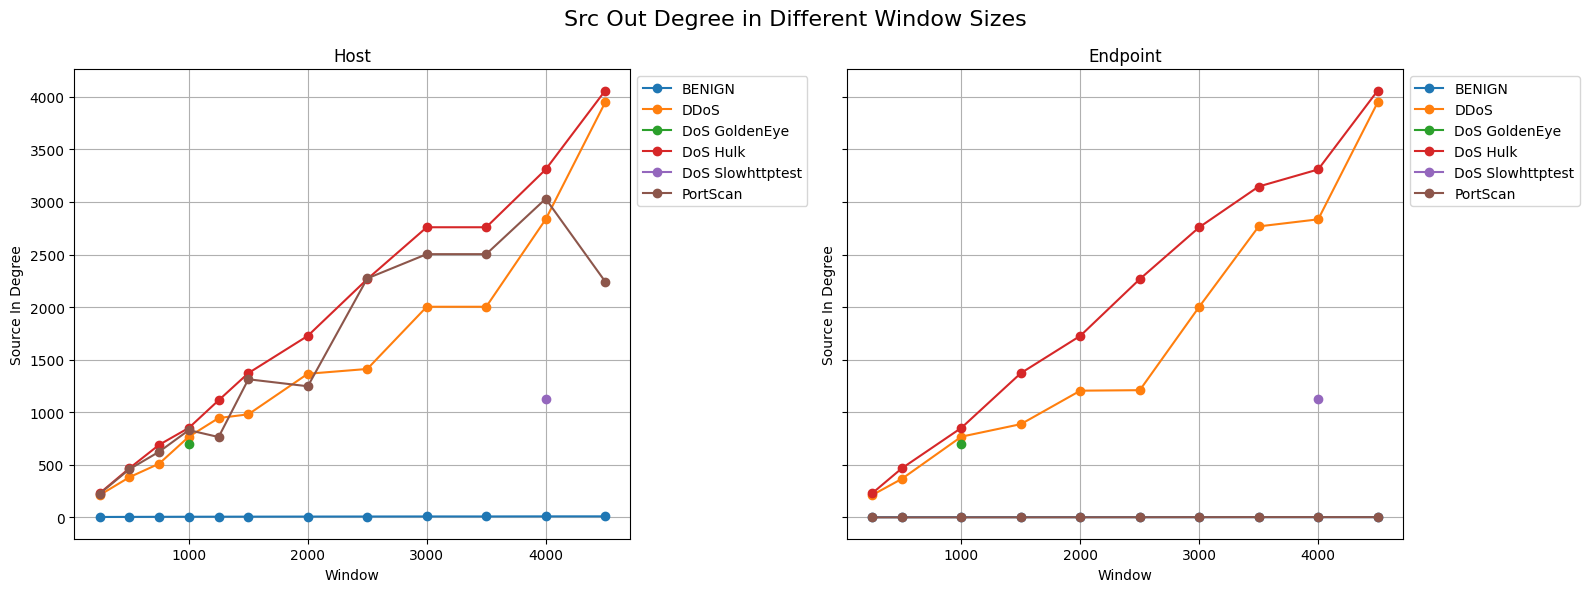

In [6]:
# Plot Min Avg Max Src Out Degree per Class
def plot_degree(report, degree_type='in_degree'):
    fig, axes = plt.subplots(1, len(report), figsize=(16, 6), sharey=True)

    if len(report) == 1:
        axes = [axes]

    for ax, (host_type, data) in zip(axes, report.items()):
        attack_names = set()
        for window_size, attacks in data.items():
            for attack_name in attacks:
                if attack_name not in ignore_attacks:
                    attack_names.add(attack_name)

        attack_names = sorted(attack_names)
        window_sizes = sorted(data.keys())

        for attack_name in attack_names:
            min_degrees, avg_degrees, max_degrees = [], [], []
            for window_size in window_sizes:
                attacks = data[window_size]
                if attack_name in attacks and degree_type in attacks[attack_name]:
                    min_d, avg_d, max_d = attacks[attack_name][degree_type]
                    min_degrees.append(min_d)
                    avg_degrees.append(avg_d)
                    max_degrees.append(max_d)
                else:
                    min_degrees.append(np.nan)
                    avg_degrees.append(np.nan)
                    max_degrees.append(np.nan)
            ax.plot(window_sizes, avg_degrees, marker='o', label=attack_name)

        ax.set_title(f'{host_type.capitalize()}')
        ax.set_xlabel('Window')
        ax.set_ylabel('Source In Degree')
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.grid(True)

    fig.suptitle(f'Src Out Degree in Different Window Sizes', fontsize=16)
    plt.tight_layout()
    plt.show()

plot_degree(report)

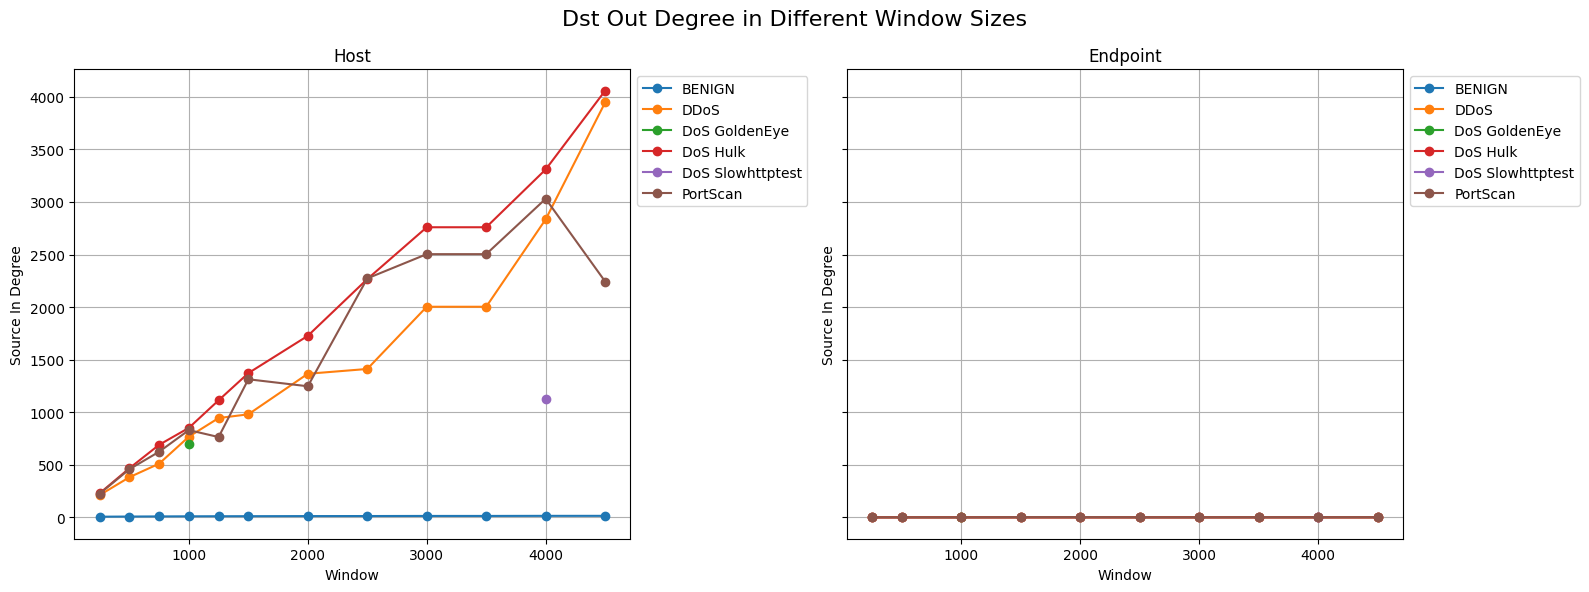

In [7]:
# Plot Min Avg Max Src Out Degree per Class
def plot_degree(report, degree_type='out_degree'):
    fig, axes = plt.subplots(1, len(report), figsize=(16, 6), sharey=True)

    if len(report) == 1:
        axes = [axes]

    for ax, (host_type, data) in zip(axes, report.items()):
        attack_names = set()
        for window_size, attacks in data.items():
            for attack_name in attacks:
                if attack_name not in ignore_attacks:
                    attack_names.add(attack_name)

        attack_names = sorted(attack_names)
        window_sizes = sorted(data.keys())

        for attack_name in attack_names:
            min_degrees, avg_degrees, max_degrees = [], [], []
            for window_size in window_sizes:
                attacks = data[window_size]
                if attack_name in attacks and degree_type in attacks[attack_name]:
                    min_d, avg_d, max_d = attacks[attack_name][degree_type]
                    min_degrees.append(min_d)
                    avg_degrees.append(avg_d)
                    max_degrees.append(max_d)
                else:
                    min_degrees.append(np.nan)
                    avg_degrees.append(np.nan)
                    max_degrees.append(np.nan)
            ax.plot(window_sizes, avg_degrees, marker='o', label=attack_name)

        ax.set_title(f'{host_type.capitalize()}')
        ax.set_xlabel('Window')
        ax.set_ylabel('Source In Degree')
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.grid(True)

    fig.suptitle(f'Dst Out Degree in Different Window Sizes', fontsize=16)
    plt.tight_layout()
    plt.show()

plot_degree(report)

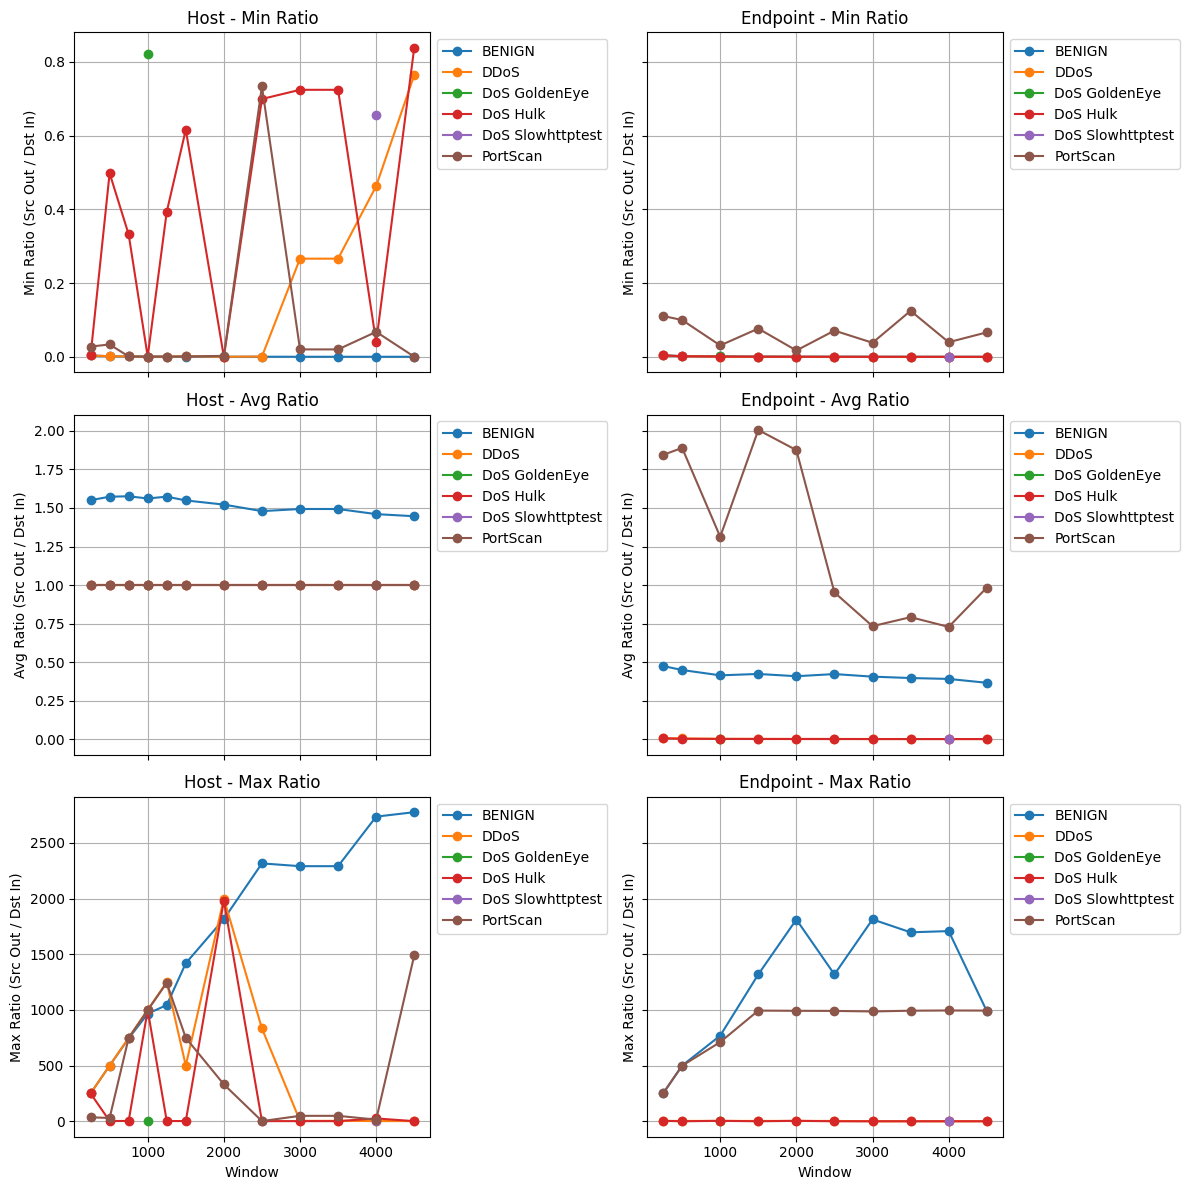

In [8]:
def plot_ratio(report):
    n_cols = len(report)
    fig, axes = plt.subplots(3, n_cols, figsize=(6 * n_cols, 12), sharex='col', sharey='row')

    if n_cols == 1:
        axes = axes.reshape(3, 1)

    for col, (host_type, data) in enumerate(report.items()):
        attack_names = set()
        for window_size, attacks in data.items():
            for attack_name in attacks:
                if attack_name not in ignore_attacks:
                    attack_names.add(attack_name)
        attack_names = sorted(attack_names)
        window_sizes = sorted(data.keys())

        min_ratios_dict, avg_ratios_dict, max_ratios_dict = {}, {}, {}
        for attack_name in attack_names:
            min_ratios, avg_ratios, max_ratios = [], [], []
            for window_size in window_sizes:
                attacks = data[window_size]
                if attack_name in attacks and 'out_degree' in attacks[attack_name] and 'in_degree' in attacks[attack_name]:
                    min_out, avg_out, max_out = attacks[attack_name]['out_degree']
                    min_in, avg_in, max_in = attacks[attack_name]['in_degree']
                    min_ratio = min_out / max_in if max_in != 0 else np.nan
                    avg_ratio = avg_out / avg_in if avg_in != 0 else np.nan
                    max_ratio = max_out / min_in if min_in != 0 else np.nan
                else:
                    min_ratio = avg_ratio = max_ratio = np.nan
                min_ratios.append(min_ratio)
                avg_ratios.append(avg_ratio)
                max_ratios.append(max_ratio)
            min_ratios_dict[attack_name] = min_ratios
            avg_ratios_dict[attack_name] = avg_ratios
            max_ratios_dict[attack_name] = max_ratios

        for attack_name in attack_names:
            axes[0, col].plot(window_sizes, min_ratios_dict[attack_name], marker='o', label=attack_name)
            axes[1, col].plot(window_sizes, avg_ratios_dict[attack_name], marker='o', label=attack_name)
            axes[2, col].plot(window_sizes, max_ratios_dict[attack_name], marker='o', label=attack_name)

        axes[0, col].set_title(f'{host_type.capitalize()} - Min Ratio')
        axes[1, col].set_title(f'{host_type.capitalize()} - Avg Ratio')
        axes[2, col].set_title(f'{host_type.capitalize()} - Max Ratio')
        axes[0, col].set_ylabel('Min Ratio (Src Out / Dst In)')
        axes[1, col].set_ylabel('Avg Ratio (Src Out / Dst In)')
        axes[2, col].set_ylabel('Max Ratio (Src Out / Dst In)')
        axes[2, col].set_xlabel('Window')
        axes[0, col].legend(loc='upper left', bbox_to_anchor=(1, 1))
        axes[1, col].legend(loc='upper left', bbox_to_anchor=(1, 1))
        axes[2, col].legend(loc='upper left', bbox_to_anchor=(1, 1))
        axes[0, col].grid(True)
        axes[1, col].grid(True)
        axes[2, col].grid(True)

    plt.tight_layout()
    plt.show()

plot_ratio(report)